Output variable -> y               
y -> Whether the client has subscribed a term deposit or not             
Binomial ("yes" or "no")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv('bank-full.csv', sep=';')

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.rename(columns={'y':'Subscribed'}, inplace = True)

In [7]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<AxesSubplot:xlabel='Subscribed', ylabel='count'>

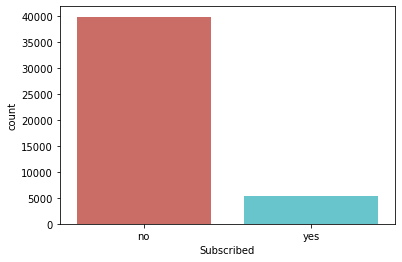

In [8]:
sb.countplot(x="Subscribed",data=data,palette="hls")

<AxesSubplot:xlabel='Subscribed'>

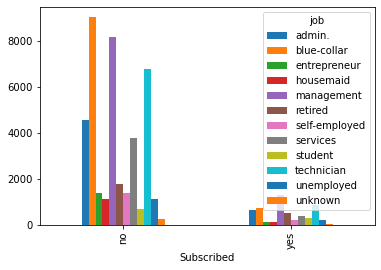

In [9]:
pd.crosstab(data.Subscribed, data.job).plot(kind="bar")

<AxesSubplot:xlabel='Subscribed'>

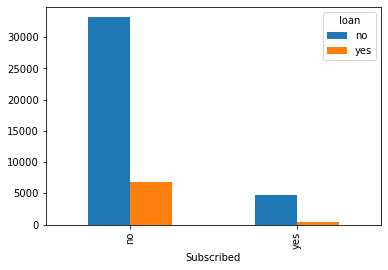

In [10]:
pd.crosstab(data.Subscribed, data.loan).plot(kind="bar")

In [11]:
data.shape

(45211, 17)

In [12]:
x=data.iloc[:,:16]
y=data.iloc[:,16:]

In [13]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [14]:
y

,Subscribed
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [15]:
columns = ['age', 'balance', 'duration', 'campaign', 'Subscribed']
data1 = data[columns]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   balance     45211 non-null  int64 
 2   duration    45211 non-null  int64 
 3   campaign    45211 non-null  int64 
 4   Subscribed  45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


In [16]:
data1

,age,balance,duration,campaign,Subscribed
0,58,2143,261,1,no
1,44,29,151,1,no
2,33,2,76,1,no
3,47,1506,92,1,no
4,33,1,198,1,no
...,...,...,...,...,...
45206,51,825,977,3,yes
45207,71,1729,456,2,yes
45208,72,5715,1127,5,yes
45209,57,668,508,4,no


<AxesSubplot:xlabel='age'>

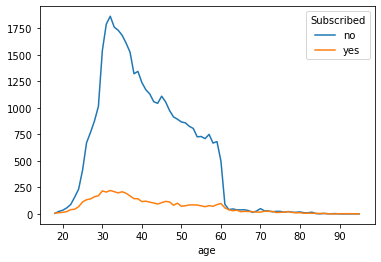

In [17]:
pd.crosstab(data1.age,data1.Subscribed).plot(kind='line')

In [18]:
data1['Outcome']=data1.Subscribed.map({'no':0,'yes':1})

<ipython-input-18-7bf02b41fd5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Outcome']=data1.Subscribed.map({'no':0,'yes':1})


In [19]:
data1

,age,balance,duration,campaign,Subscribed,Outcome
0,58,2143,261,1,no,0
1,44,29,151,1,no,0
2,33,2,76,1,no,0
3,47,1506,92,1,no,0
4,33,1,198,1,no,0
...,...,...,...,...,...,...
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0


In [20]:
X=data1.iloc[:,:4]
Y=data1.iloc[:,5]

In [21]:
classifier=LogisticRegression()

In [22]:
classifier.fit(X,Y)

LogisticRegression()

In [23]:
classifier.coef_

array([[ 7.69722482e-03,  3.72191044e-05,  3.54908926e-03,
        -1.39828346e-01]])

In [24]:
classifier.predict_proba(X)

array([[0.87367388, 0.12632612],
       [0.92488732, 0.07511268],
       [0.94596321, 0.05403679],
       ...,
       [0.30553756, 0.69446244],
       [0.82336232, 0.17663768],
       [0.86407826, 0.13592174]])

In [25]:
y_pred=classifier.predict(X)

In [26]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [27]:
data1['y_pred']=y_pred

<ipython-input-27-9cebe8e47851>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['y_pred']=y_pred


In [28]:
data1

,age,balance,duration,campaign,Subscribed,Outcome,y_pred
0,58,2143,261,1,no,0,0
1,44,29,151,1,no,0,0
2,33,2,76,1,no,0,0
3,47,1506,92,1,no,0,0
4,33,1,198,1,no,0,0
...,...,...,...,...,...,...,...
45206,51,825,977,3,yes,1,1
45207,71,1729,456,2,yes,1,0
45208,72,5715,1127,5,yes,1,1
45209,57,668,508,4,no,0,0


In [29]:
pd.crosstab(data1.Outcome,data1.y_pred)

y_pred,0,1
Outcome,,
0,39342,580
1,4435,854


In [30]:
y_prob=pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))

In [31]:
y_prob

,0,1
0,0.873674,0.126326
1,0.924887,0.075113
2,0.945963,0.054037
3,0.933517,0.066483
4,0.919056,0.080944
...,...,...
45206,0.444056,0.555944
45207,0.785320,0.214680
45208,0.305538,0.694462
45209,0.823362,0.176638


In [32]:
data2=pd.concat([data1,y_prob],axis=1)
data2

,age,balance,duration,campaign,Subscribed,Outcome,y_pred,0,1
0,58,2143,261,1,no,0,0,0.873674,0.126326
1,44,29,151,1,no,0,0,0.924887,0.075113
2,33,2,76,1,no,0,0,0.945963,0.054037
3,47,1506,92,1,no,0,0,0.933517,0.066483
4,33,1,198,1,no,0,0,0.919056,0.080944
...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,yes,1,1,0.444056,0.555944
45207,71,1729,456,2,yes,1,0,0.785320,0.214680
45208,72,5715,1127,5,yes,1,1,0.305538,0.694462
45209,57,668,508,4,no,0,0,0.823362,0.176638


In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [36]:
Logit_auc_score=roc_auc_score(Y,classifier.predict(X))
Logit_auc_score

0.5734694329116669

In [41]:
fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])

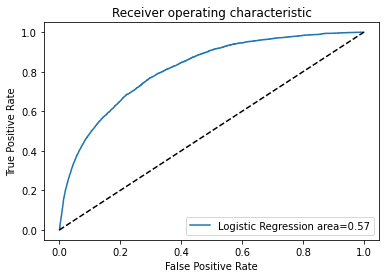

In [49]:
plt.plot(fpr,tpr,label='Logistic Regression area=%0.2f'%Logit_auc_score)
plt.plot((0,1),(0,1),'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")